# SMS Spam Detection Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.compose import ColumnTransformer
from IPython.display import display
from wordcloud import WordCloud
import pickle
from nltk.stem import WordNetLemmatizer

In [2]:
sms_data = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# This function provides all information about the dataset

def dataset_info(dataset):
    
    print("Information about dataset,")
    
    print(f"\n1. Dataset shape: {dataset.shape}")
    
    print(f"\n2. Dataset size: {dataset.size}")
    
    print(f"\n3. First 5 data:")
    display(dataset.head())
    
    print(f"\n4. Last 5 data:")
    display(dataset.tail())
    
    print(f"\n5. Random 10 data:")
    display(dataset.sample(10))
    
    print(f"\n6. All columns datatypes: \n\n{dataset.dtypes}")
    
    print(f"\n7. statistics values of dataset: ")
    display(dataset.describe())
    
    print(f"\n8. Total Null values: \n\n{dataset.isnull().sum()}")

    print(f"\n9. Total Duplicated values: {dataset.duplicated().sum()}")
    
    return

In [4]:
all_info = dataset_info(sms_data)
all_info

Information about dataset,

1. Dataset shape: (5572, 5)

2. Dataset size: 27860

3. First 5 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



4. Last 5 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN



5. Random 10 data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4291,ham,G.W.R,NaN,NaN,NaN
637,ham,When Ì_ login dat time... Dad fetching Ì_ home...,NaN,NaN,NaN
1183,ham,Am i that much bad to avoid like this?,NaN,NaN,NaN
5084,ham,Hey happy birthday...,NaN,NaN,NaN
4034,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...,NaN,NaN,NaN
1587,ham,"Dont search love, let love find U. Thats why i...",NaN,NaN,NaN
5153,ham,Haven't left yet so probably gonna be here til...,NaN,NaN,NaN
4065,ham,Fyi I'm gonna call you sporadically starting a...,NaN,NaN,NaN
5383,ham,Good day to You too.Pray for me.Remove the tee...,NaN,NaN,NaN
1396,ham,Shall i start from hear.,NaN,NaN,NaN



6. All columns datatypes: 

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

7. statistics values of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



8. Total Null values: 

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

9. Total Duplicated values: 403


## 1. Data cleaning

### Create a copy of the original dataset

In [5]:
df = sms_data.copy()
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4766,spam,Your unique user ID is 1172. For removal send ...,NaN,NaN,NaN
1191,ham,Come to my home for one last time i wont do an...,NaN,NaN,NaN
764,ham,"Wishing you and your family Merry \X\"" mas and...",NaN,NaN,NaN
5329,ham,"Sir, waiting for your letter.",NaN,NaN,NaN
2357,ham,Okay same with me. Well thanks for the clarifi...,NaN,NaN,NaN


### Remove unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.columns

Index(['v1', 'v2'], dtype='object')

### Renaming the columns 


In [7]:
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding target column

In [8]:
encoder = LabelEncoder()

In [9]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

,Target,Text
4178,0,Can Ì_ send me a copy of da report?
3394,0,Then i buy.
4398,0,Yes just finished watching days of our lives. ...
739,0,Haha mayb u're rite... U know me well. Da feel...
3657,0,R u here yet? I'm wearing blue shirt n black p...


In [10]:
df['Target'].value_counts()

Target
0    4825
1     747
Name: count, dtype: int64

### Checking null values

In [11]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

### Remove duplicated values

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

## 2. Data Preprocessing


In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
def data_preprocessing(df):
    
    df['clean_text'] = df['Text'].apply(lambda x:x.lower())
    df['clean_text'] = df['clean_text'].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)))
    df['clean_text'] = df['clean_text'].apply(lambda x:word_tokenize(x))
    df['clean_text'] = df['clean_text'].apply(lambda x:[lemmatizer.lemmatize(i, 'v') for i in x])
    df['clean_text'] = df['clean_text'].apply(lambda x:" ".join(x))
    
    return df[['clean_text']]


### Create 'number of character' column

In [18]:
df['num_character'] = df['Text'].apply(len)
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/umangaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/umangaj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Create 'number of word' column

In [20]:
df['Text'].apply(lambda x:word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [21]:
df['Text'].apply(lambda x:len(word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [22]:
df['num_word'] = df['Text'].apply(lambda x:len(word_tokenize(x)))
df.head()

,Target,Text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Create 'number of sentence' column

In [23]:
df['Text'].apply(lambda x:len(sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [24]:
df['num_sentence'] = df['Text'].apply(lambda x:len(sent_tokenize(x)))
df.head()

,Target,Text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,Target,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


## 3. Exploratory Data Analysis (EDA)


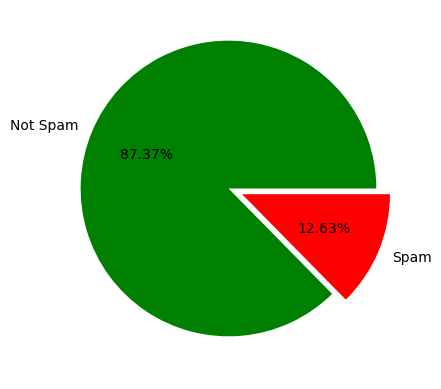

In [26]:
plt.pie(df['Target'].value_counts(), autopct='%0.2f%%', labels=['Not Spam', 'Spam'], explode=[0.1, 0], colors=['green', 'red'])
plt.show()

<AxesSubplot: xlabel='num_character', ylabel='Density'>

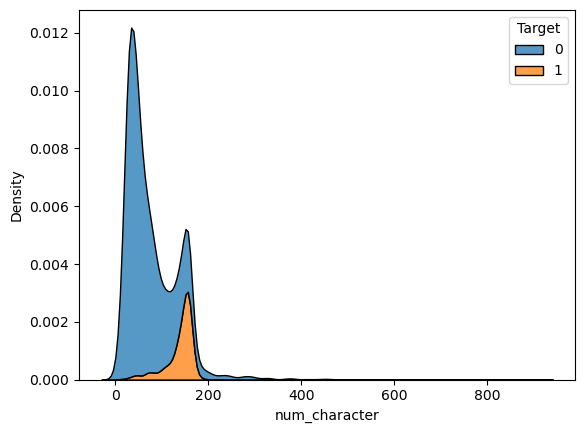

In [27]:
sns.kdeplot(x=df['num_character'], hue=df['Target'], multiple='stack')

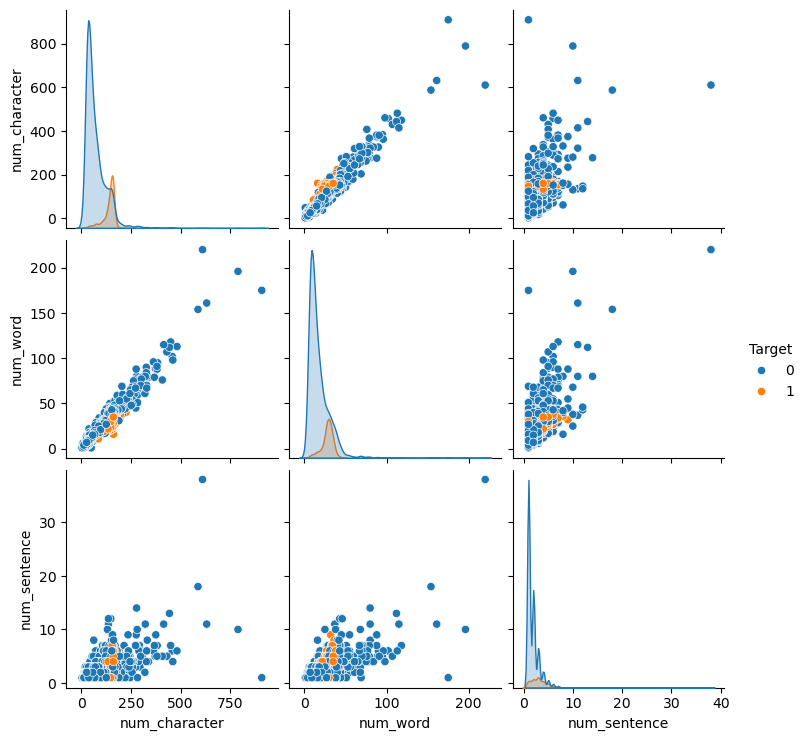

In [28]:
sns.pairplot(df, hue='Target')

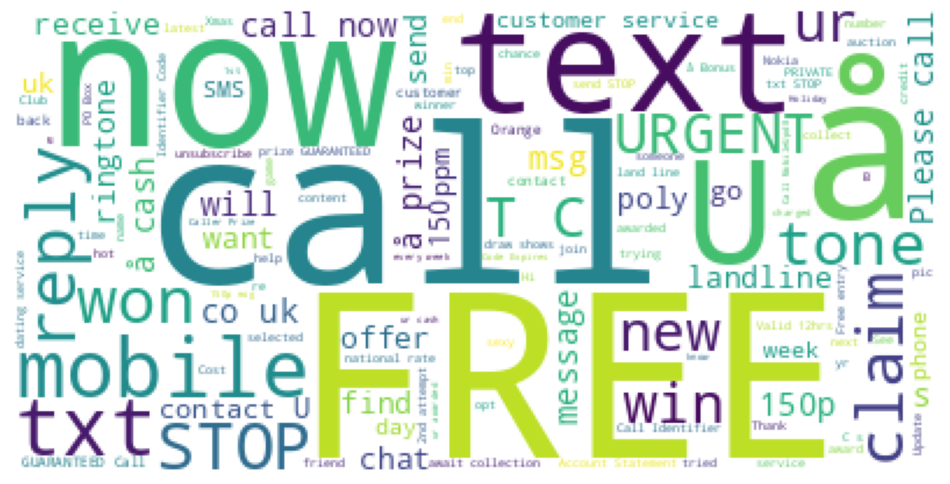

In [29]:
# The term spam is often used 

spam_word = df[df['Target']==1]['Text'].apply(lambda x:word_tokenize(x)).values

spam_word_list = []
for i in spam_word:
    spam_word_list.append(" ".join(i))

only_spam_word = " ".join(spam_word_list)

wordcloud = WordCloud(background_color="white").generate(only_spam_word)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. Model Building 


In [30]:
X = df[['Text']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


1. accuracy score of all models


,model_name,accuracy_score
0,SVM,0.968407
1,Logistic Regression,0.965184
2,Multinomial_NB,0.962605



2. Graphical representation of all model accuracy score


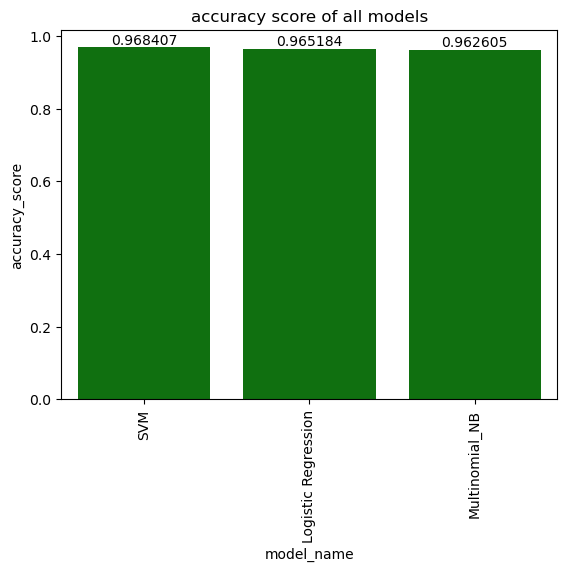

In [31]:
def all_in_one():
    
    functrf = FunctionTransformer(data_preprocessing, validate=False)
    
    clmtrf = ColumnTransformer([
        ('clmtrf', TfidfVectorizer(max_features=3000), 'clean_text')
    ], remainder='drop')

    svm = SVC(kernel='linear')
    lr = LogisticRegression()    
    mnb = MultinomialNB()

    balanced_bagging_classifier = BalancedBaggingClassifier(svm,
                                                        sampling_strategy='auto', 
                                                        replacement=False,
                                                        random_state=42)

    pipe_svm = Pipeline(steps=[('functrf', functrf), ('clmtrf', clmtrf), ('svm', balanced_bagging_classifier)])

    pipe_lr = Pipeline(steps=[('functrf', functrf), ('clmtrf', clmtrf), ('lr', lr)])

    pipe_mnb = Pipeline(steps=[('functrf', functrf), ('clmtrf', clmtrf), ('mnb', mnb)])
    
    pipe = [pipe_svm, pipe_lr, pipe_mnb]
    model_list = ['SVM', 'Logistic Regression', 'Multinomial_NB']
    
    model_score = []
    y_pred_list = []
    for i in range(len(pipe)):
        pipe[i].fit(X_train,y_train)
        y_pred = pipe[i].predict(X_test)
        model_score.append([model_list[i], accuracy_score(y_test, y_pred)])
        y_pred_list.append(y_pred)

    model_score_df = pd.DataFrame(model_score,columns=['model_name', 'accuracy_score'])
    print('\n1. accuracy score of all models')
    display(model_score_df)
    
    # Graphical representation of all model accuracy score
    print('\n2. Graphical representation of all model accuracy score')
    ax = sns.barplot(x=model_score_df['model_name'], y=model_score_df['accuracy_score'], color='green')
    plt.xticks(rotation='vertical')
    ax.bar_label(ax.containers[0])
    plt.title('accuracy score of all models')
    plt.show()
    
    return pipe, y_pred_list

all_info = all_in_one()

In [32]:
all_info

([Pipeline(steps=[('functrf',
                   FunctionTransformer(func=<function data_preprocessing at 0x700ad2843100>)),
                  ('clmtrf',
                   ColumnTransformer(transformers=[('clmtrf',
                                                    TfidfVectorizer(max_features=3000),
                                                    'clean_text')])),
                  ('svm',
                   BalancedBaggingClassifier(estimator=SVC(kernel='linear'),
                                             random_state=42))]),
  Pipeline(steps=[('functrf',
                   FunctionTransformer(func=<function data_preprocessing at 0x700ad2843100>)),
                  ('clmtrf',
                   ColumnTransformer(transformers=[('clmtrf',
                                                    TfidfVectorizer(max_features=3000),
                                                    'clean_text')])),
                  ('lr', LogisticRegression())]),
  Pipeline(steps=[('functrf',
   

In [33]:
pipe_svm = all_info[0][0]
y_pred_svm = all_info[1][0]

In [34]:
accuracy_score(y_test, y_pred_svm)

0.968407479045777

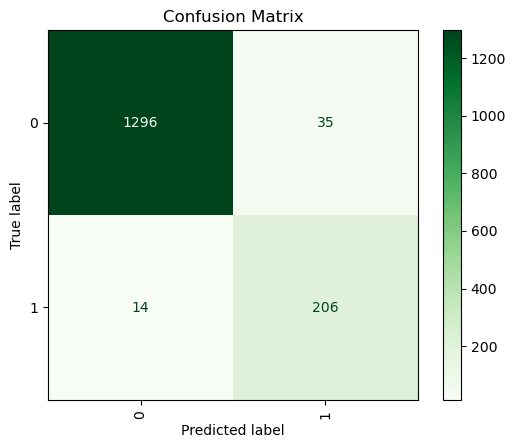

In [35]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels= list(df['Target'].unique()))
disp.plot(cmap = plt.cm.Greens)
plt.title('Confusion Matrix')
plt.xticks(rotation='vertical')
plt.show()

In [36]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1331
           1       0.85      0.94      0.89       220

    accuracy                           0.97      1551
   macro avg       0.92      0.96      0.94      1551
weighted avg       0.97      0.97      0.97      1551



In [37]:
user_input = '''Congratulations! 🎉 You've won a free iPhone 15! Click here to claim your prize: [malicious-link].  
'''

In [38]:
user_input = pd.DataFrame({'Text': [user_input]})
user_input

,Text
0,Congratulations! 🎉 You've won a free iPhone 15...


In [39]:
prediction = pipe_svm.predict(user_input)[0]
if prediction == 0:
    print('Not Spam')
else:
    print('Spam')

Spam


In [41]:
pickle.dump(pipe_svm, open('model.pkl', 'wb'))